
Each stage of the CRISP-DM process will be looked at in this notebook. These stages are:

- Business Understanding

- Data Understanding

- Prepare Data

- Data Modeling

- Evaluate the Results

# 1. Business Understanding
I have explored here the 2017 Stack Overflow results in order to obtain some information on software developers like the importance of the job industry to be assessed while applying, what developers would require when they share an office and which development environment has been used regularly.
There will be three questions I will seek to answer in order to get this information:
1. If two developers are sharing an office, is it okay for one of them to get a mechnical keyboard with loud "clicky" keys?
2. Which development environment(s) do we use regularly?
3. When you're assessing potential jobs to apply to, how important are each of the following to you? The languages, frameworks, and other technologies I'd be working with?

# 2. Data Understanding
In order to gain some understanding of the data I loaded it into a dataframe and ran df.head(). This gave me 5 example entries of each column.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data_path = r'./survey_results_public.csv'

data_load = pd.read_csv(data_path)

df = pd.DataFrame(data_load)

df

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.00000,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Student,"Yes, both",New Zealand,"Yes, full-time","Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Disagree,NaN,A bachelor's degree,White or of European descent,Disagree,Agree,Disagree,Agree,NaN,NaN
6,7,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Master's degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...",20 to 99 employees,...,Disagree,Male,A doctoral degree,White or of European descent,Disagree,Agree,Disagree,Agree,NaN,NaN
7,8,Professional developer,"Yes, both",Poland,No,Employed full-time,Master's degree,Computer science or software engineering,All or almost all the time (I'm full-time remote),Fewer than 10 employees,...,Somewhat agree,Male,A master's degree,White or of European descent,Agree,Somewhat agree,Disagree,Agree,NaN,NaN
8,9,Professional developer,"Yes, I program as a hobby",Colombia,"Yes, part-time",Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","5,000 to 9,999 employees",...,Strongly disagree,Male,A bachelor's degree,Hispanic or Latino/Latina,Somewhat agree,Strongly agree,Disagree,Strongly agree,NaN,NaN
9,10,Professional developer,"Yes, I program as a hobby",France,"Yes, full-time","Independent contractor, freelancer, or self-em...",Master's degree,Computer science or software engineering,It's complicated,NaN,...,Disagree,Male,A doctoral degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,NaN,NaN


## Question: 
If two developers are sharing an office, is it okay for one of them to get a mechnical keyboard with loud "clicky" keys?

## Data preparation and Data Modeling: 
To answer this question I am only considering professional developers who DO NOT code for hobby but code professionally. Also, dropping rows where developers are working fully remote as they will not be impacted. Eliminating missing values from target column i.e. ClickyKeys

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


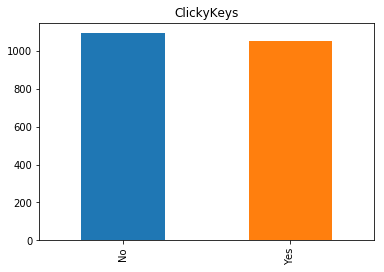

In [2]:
df_ck = df[['Professional','ProgramHobby','HomeRemote','ClickyKeys']]
df_ck = df_ck[df_ck.Professional == "Professional developer"]
df_ck = df_ck[df_ck.ProgramHobby == 'No']
df_ck = df_ck[df.HomeRemote != r"All or almost all the time (I'm full-time remote)"]
df_ck = df_ck.dropna(subset=['ClickyKeys'])
df_ck

#plotting begins

x = df_ck.ClickyKeys.value_counts()

x.plot(kind="bar");
plt.title("ClickyKeys");


## Evaluating Results: 
No, it is not okay for one of them to get a mechanical keyboard

## Question - IDE: 
Which development environment(s) do you use regularly? 

## Data Preparation and Data Modeling : 
Dropping rows where IDE column has missing values

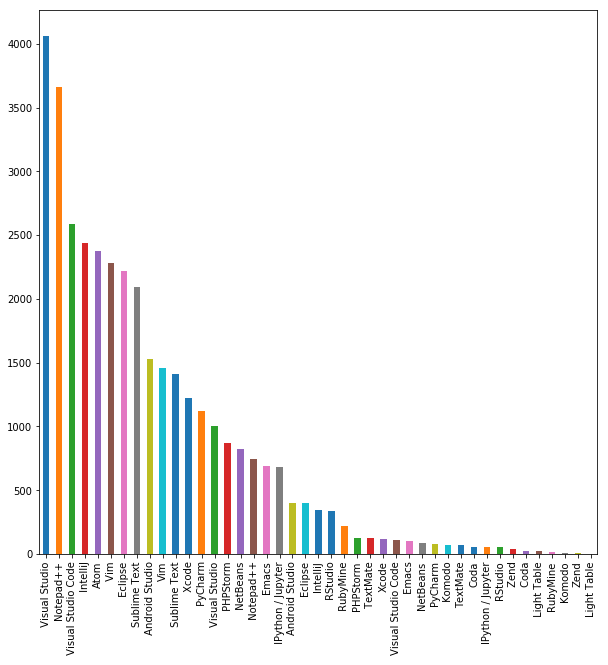

In [3]:
df_ide = df[['IDE']]
df_ide.dropna(subset = ['IDE'])

df_ide = df['IDE'].str.split(';',expand = True).stack().value_counts()  #expand the substrings into new columns so that they can be counted

plt.figure(figsize=(10,10))  # added this since otherwise the plot is unclear and small
df_ide.plot(kind="bar")

# Answer - Visual Studio

## Evaluating results: 
Visual Studio is the development environment we use regularly

# Assessing job industry to apply jobs in

## Question - 
When you're assessing potential jobs to apply to, how important are each of the following to you? The languages, frameworks, and other technologies I'd be working with

## Data Preparation and Data Modeling: 
To answer this, I am considering only records where respondent has indicated that they are actively looking for a job or are open to new opportunities



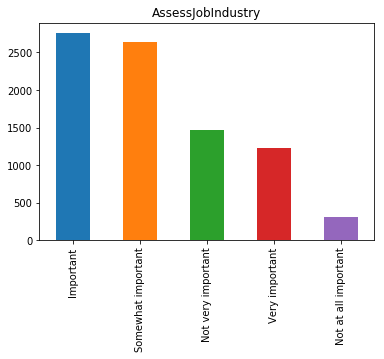

In [9]:
df_aji = df[['JobSeekingStatus','AssessJobIndustry']]

df_aji = df_aji[df_aji.JobSeekingStatus != r"I am not interested in new job opportunities"]
df_aji = df_aji.dropna(subset = ['JobSeekingStatus','AssessJobIndustry'])

df_aji_plot = df.AssessJobIndustry.value_counts()

df_aji_plot.plot(kind="bar");
plt.title("AssessJobIndustry");


## Evaluating results: 
Assesing job industry while searching and applying jobs is important